In [1]:
import pandas as pd

In [2]:
df= pd.read_csv('international_matches.csv')

In [3]:
# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [31]:
df.head(5)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

Lista de Paises

In [6]:
unique_countries = df['country'].unique()
unique_countries_sorted = sorted(unique_countries)

unique_countries_sorted

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China PR',
 'Chinese Taipei',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo DR',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'East Timor',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'England',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Faroe Islands',
 'Fiji',
 'Finland',


Continente con mas partidos ganados

In [7]:
# Filtrar los partidos que terminaron en victoria para el equipo local
winning_matches = df[df['home_team_result'] == 'Win']

# Contar las victorias por continente para los equipos locales
home_wins_by_continent = winning_matches['home_team_continent'].value_counts()

# Encontrar el continente con más victorias
continent_with_most_wins = home_wins_by_continent.idxmax()
total_wins = home_wins_by_continent.max()

print("El continente que ha ganado más partidos de fútbol es:", continent_with_most_wins)
print("Total de victorias:", total_wins)

El continente que ha ganado más partidos de fútbol es: Europe
Total de victorias: 3517


Lista de continentes con más partidos ganados

In [8]:
# Contar las victorias por continente para los equipos locales
home_wins_by_continent = winning_matches['home_team_continent'].value_counts()

# Ordenar la lista de mayor a menor
sorted_continents = home_wins_by_continent.sort_values(ascending=False)

print("Lista de continentes con más partidos ganados:")
for continent, wins in sorted_continents.items():
    print(f"Continente: {continent}, Partidos ganados: {wins}")

Lista de continentes con más partidos ganados:
Continente: Europe, Partidos ganados: 3517
Continente: Africa, Partidos ganados: 2942
Continente: Asia, Partidos ganados: 2585
Continente: North America, Partidos ganados: 1369
Continente: South America, Partidos ganados: 1062
Continente: Oceania, Partidos ganados: 286


Top 5 de cada Continente

In [9]:
# Crear un diccionario para almacenar los equipos y sus victorias por continente
teams_by_continent = {}

# Iterar a través de los partidos ganados y agregar los equipos a la lista correspondiente en el diccionario
for index, row in winning_matches.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_team_continent = row['home_team_continent']
    away_team_continent = row['away_team_continent']
    
    if home_team_continent not in teams_by_continent:
        teams_by_continent[home_team_continent] = {}
    if away_team_continent not in teams_by_continent:
        teams_by_continent[away_team_continent] = {}
    
    teams_by_continent[home_team_continent][home_team] = teams_by_continent[home_team_continent].get(home_team, 0) + 1
    teams_by_continent[away_team_continent][away_team] = teams_by_continent[away_team_continent].get(away_team, 0) + 1

# Imprimir el top 5 de equipos por continente
for continent, teams in teams_by_continent.items():
    print(f"Top 5 de equipos en {continent}:")
    sorted_teams = sorted(teams.items(), key=lambda x: x[1], reverse=True)[:5]
    for team, wins in sorted_teams:
        print(f"Equipo: {team}, Partidos ganados: {wins}")
    print("\n")

Top 5 de equipos en South America:
Equipo: Brazil, Partidos ganados: 216
Equipo: Trinidad and Tobago, Partidos ganados: 207
Equipo: Chile, Partidos ganados: 190
Equipo: Ecuador, Partidos ganados: 181
Equipo: Argentina, Partidos ganados: 178


Top 5 de equipos en Africa:
Equipo: Egypt, Partidos ganados: 223
Equipo: South Africa, Partidos ganados: 197
Equipo: Zambia, Partidos ganados: 186
Equipo: Tunisia, Partidos ganados: 181
Equipo: Ghana, Partidos ganados: 179


Top 5 de equipos en Oceania:
Equipo: Australia, Partidos ganados: 163
Equipo: New Zealand, Partidos ganados: 104
Equipo: Fiji, Partidos ganados: 56
Equipo: Solomon Islands, Partidos ganados: 56
Equipo: Tahiti, Partidos ganados: 52


Top 5 de equipos en North America:
Equipo: Mexico, Partidos ganados: 269
Equipo: USA, Partidos ganados: 261
Equipo: Costa Rica, Partidos ganados: 209
Equipo: Jamaica, Partidos ganados: 189
Equipo: Honduras, Partidos ganados: 174


Top 5 de equipos en Europe:
Equipo: Estonia, Partidos ganados: 174
E

In [10]:
# Calcular la tasa de victoria para los equipos locales y visitantes en diferentes ciudades
city_win_rates = df.groupby('city')['home_team_result'].apply(lambda x: (x == 'Win').mean())

# Calcular la tasa de victoria promedio para todos los partidos
global_win_rate = (df['home_team_result'] == 'Win').mean()

# Imprimir los resultados
print("Tasa de victoria promedio global:", global_win_rate)
print("Tasa de victoria para equipos locales y visitantes en diferentes ciudades:")
print(city_win_rates)

Tasa de victoria promedio global: 0.49166004765687055
Tasa de victoria para equipos locales y visitantes en diferentes ciudades:
city
6th of October City    0.400000
Aachen                 1.000000
Aalborg                0.750000
Aarhus                 0.444444
Abeokuta               1.000000
                         ...   
Łódź                   0.285714
Ōita                   0.333333
Šibenik                0.000000
Žilina                 0.428571
‘Atele                 0.500000
Name: home_team_result, Length: 1576, dtype: float64


In [11]:
#Filtrar solo los partidos donde el país fue el equipo local
local_matches = df[df['home_team'] == df['country']]

# Calcular la tasa de victoria para los partidos locales por país
local_win_rates = local_matches.groupby('country')['home_team_result'].apply(lambda x: (x == 'Win').mean())

# Imprimir los resultados
print("Tasa de victoria para partidos locales por país:")
print(local_win_rates)

Tasa de victoria para partidos locales por país:
country
Afghanistan    0.500000
Albania        0.405405
Algeria        0.669725
Andorra        0.115385
Angola         0.620000
                 ...   
Vietnam        0.462366
Wales          0.410256
Yemen          0.409091
Zambia         0.600000
Zimbabwe       0.568807
Name: home_team_result, Length: 208, dtype: float64


In [12]:
# Imprimir la lista completa sin resumir
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(local_win_rates)

country
Afghanistan                       0.500000
Albania                           0.405405
Algeria                           0.669725
Andorra                           0.115385
Angola                            0.620000
Anguilla                          0.000000
Antigua and Barbuda               0.482759
Argentina                         0.685714
Armenia                           0.326316
Aruba                             0.388889
Australia                         0.702703
Austria                           0.445161
Azerbaijan                        0.250000
Bahamas                           0.333333
Bahrain                           0.471698
Bangladesh                        0.480000
Barbados                          0.402985
Belarus                           0.375000
Belgium                           0.586957
Belize                            0.416667
Benin                             0.455882
Bermuda                           0.452381
Bhutan                            0.357143
Bol

In [13]:
df['tournament'].unique()

array(['FIFA World Cup qualification', 'Friendly',
       'African Cup of Nations qualification', 'Amílcar Cabral Cup',
       'CFU Caribbean Cup qualification',
       'United Arab Emirates Friendship Tournament',
       'Malta International Tournament', 'Lunar New Year Cup',
       'African Cup of Nations', 'CFU Caribbean Cup',
       'UEFA Euro qualification', 'Kirin Cup', 'FIFA World Cup',
       'Oceania Nations Cup qualification', 'Baltic Cup', 'Gulf Cup',
       'Simba Tournament', 'CECAFA Cup', 'Confederations Cup',
       'Dynasty Cup', "King's Cup", 'Nehru Cup', 'SAFF Cup',
       'Copa Paz del Chaco', 'Korea Cup', 'USA Cup', 'Copa América',
       'Merdeka Tournament', 'South Pacific Games', 'UNCAF Cup',
       'Oceania Nations Cup', 'Windward Islands Tournament', 'Gold Cup',
       'AFC Asian Cup qualification', 'UEFA Euro', 'AFF Championship',
       'AFC Asian Cup', 'King Hassan II Tournament',
       'Cyprus International Tournament', 'Dunhill Cup',
       'COSAFA Cup qu

In [14]:
# Filtrar solo los registros correspondientes al torneo FIFA World Cup
world_cup_matches = df[df['tournament'] == 'FIFA World Cup']

# Calcular la cantidad de partidos ganados por cada país
win_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['home_team'].value_counts()

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_counts_df = win_counts.reset_index()
win_counts_df.columns = ['country', 'wins']
win_counts_df['continent'] = win_counts_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron
top_5_by_continent = (
    win_counts_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'wins'))
    .reset_index(drop=True)
)

# Imprimir el top 5 de países por continente que más partidos ganaron
print(top_5_by_continent)

           country  wins      continent
0          Nigeria     4         Africa
1    Côte d'Ivoire     2         Africa
2     South Africa     2         Africa
3            Ghana     1         Africa
4         Cameroon     1         Africa
5   Korea Republic     7           Asia
6            Japan     3           Asia
7     Saudi Arabia     2           Asia
8          Germany    21         Europe
9           France    14         Europe
10     Netherlands    12         Europe
11         Belgium    10         Europe
12           Italy    10         Europe
13          Mexico     4  North America
14             USA     3  North America
15      Costa Rica     1  North America
16       Australia     2        Oceania
17          Brazil    24  South America
18       Argentina    17  South America
19         Uruguay     5  South America
20        Colombia     4  South America
21           Chile     2  South America


## Taza de victoria por continente

In [15]:
# Filtrar solo los registros correspondientes al torneo FIFA World Cup
world_cup_matches = df[df['tournament'] == 'FIFA World Cup']

# Calcular la cantidad de partidos ganados y jugados por cada país
win_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['home_team'].value_counts()
total_matches = world_cup_matches['home_team'].value_counts()

# Calcular la tasa de victoria en la Copa del Mundo para cada país
win_rate = win_counts / total_matches

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_rate_df = win_rate.reset_index()
win_rate_df.columns = ['country', 'win_rate']
win_rate_df['continent'] = win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron
top_5_by_continent = (
    win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'win_rate'))
    .reset_index(drop=True)
)

# Imprimir el top 5 de países por continente y su tasa de victoria en la Copa del Mundo
print(top_5_by_continent)

                   country  win_rate      continent
0            Côte d'Ivoire  0.666667         Africa
1                  Nigeria  0.363636         Africa
2             South Africa  0.285714         Africa
3                    Ghana  0.250000         Africa
4                 Cameroon  0.142857         Africa
5           Korea Republic  0.466667           Asia
6             Saudi Arabia  0.285714           Asia
7                    Japan  0.230769           Asia
8                 China PR       NaN           Asia
9                  IR Iran       NaN           Asia
10  Bosnia and Herzegovina  1.000000         Europe
11                  Norway  1.000000         Europe
12                  Turkey  1.000000         Europe
13                 Ukraine  1.000000         Europe
14                 Belgium  0.769231         Europe
15                  Mexico  0.400000  North America
16                     USA  0.272727  North America
17              Costa Rica  0.166667  North America
18          

In [16]:
# Filtrar solo los registros correspondientes al torneo FIFA World Cup y eliminar filas con NaN en 'home_team_result'
world_cup_matches = df[(df['tournament'] == 'FIFA World Cup') & (df['home_team_result'].notna())]

# Calcular la cantidad de partidos ganados y jugados por cada país
win_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['home_team'].value_counts()
total_matches = world_cup_matches['home_team'].value_counts()

# Calcular la tasa de victoria en la Copa del Mundo para cada país
win_rate = win_counts / total_matches

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_rate_df = win_rate.reset_index()
win_rate_df.columns = ['country', 'win_rate']
win_rate_df['continent'] = win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron
top_5_by_continent = (
    win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'win_rate'))
    .reset_index(drop=True)
)

# Imprimir el top 5 de países por continente y su tasa de victoria en la Copa del Mundo
print(top_5_by_continent)

                   country  win_rate      continent
0            Côte d'Ivoire  0.666667         Africa
1                  Nigeria  0.363636         Africa
2             South Africa  0.285714         Africa
3                    Ghana  0.250000         Africa
4                 Cameroon  0.142857         Africa
5           Korea Republic  0.466667           Asia
6             Saudi Arabia  0.285714           Asia
7                    Japan  0.230769           Asia
8                 China PR       NaN           Asia
9                  IR Iran       NaN           Asia
10  Bosnia and Herzegovina  1.000000         Europe
11                  Norway  1.000000         Europe
12                  Turkey  1.000000         Europe
13                 Ukraine  1.000000         Europe
14                 Belgium  0.769231         Europe
15                  Mexico  0.400000  North America
16                     USA  0.272727  North America
17              Costa Rica  0.166667  North America
18          

In [22]:
# Filtrar solo los registros correspondientes al torneo FIFA World Cup
world_cup_matches = df[df['tournament'] == 'FIFA World Cup']

# Calcular la cantidad de partidos jugados, ganados, empatados y perdidos por cada país
matches_per_country = pd.concat([world_cup_matches['home_team'], world_cup_matches['away_team']]).value_counts()
win_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['home_team'].value_counts()
draw_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['home_team'].append(world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['away_team']).value_counts()
loss_counts_local = world_cup_matches[world_cup_matches['home_team_result'] == 'Loss']['home_team'].value_counts()
loss_counts_visitor = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['away_team'].value_counts()

# Combinar las cuentas de partidos perdidos de local y visitante
loss_counts = loss_counts_local.add(loss_counts_visitor, fill_value=0)

# Calcular la tasa de victoria en la Copa del Mundo para cada país
win_rate = win_counts / matches_per_country

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_rate_df = pd.DataFrame({'country': win_rate.index, 'win_rate': win_rate.values})
win_rate_df['continent'] = win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron
top_5_by_continent = (
    win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'win_rate'))
    .reset_index(drop=True)
)

# Imprimir el top 5 de países por continente, su tasa de victoria y estadísticas de partidos jugados, ganados, empatados y perdidos
for continent, group in top_5_by_continent.groupby('continent'):
    print(f"Continente: {continent}")
    for index, row in group.iterrows():
        country = row['country']
        win_rate = row['win_rate']
        total = matches_per_country.get(country, 0)
        wins = win_counts.get(country, 0)
        draws = draw_counts.get(country, 0)
        losses = loss_counts.get(country, 0)
        print(f"{country}: Tasa de victoria = {win_rate:.4f}, Partidos jugados = {total}, Partidos ganados = {wins}, Partidos empatados = {draws}, Partidos perdidos = {losses}")
    print("="*40)

Continente: Africa
Côte d'Ivoire: Tasa de victoria = 0.2222, Partidos jugados = 9, Partidos ganados = 2, Partidos empatados = 1, Partidos perdidos = 5.0
South Africa: Tasa de victoria = 0.2222, Partidos jugados = 9, Partidos ganados = 2, Partidos empatados = 4, Partidos perdidos = 1.0
Nigeria: Tasa de victoria = 0.1905, Partidos jugados = 21, Partidos ganados = 4, Partidos empatados = 3, Partidos perdidos = 7.0
Ghana: Tasa de victoria = 0.0833, Partidos jugados = 12, Partidos ganados = 1, Partidos empatados = 2, Partidos perdidos = 4.0
Cameroon: Tasa de victoria = 0.0667, Partidos jugados = 15, Partidos ganados = 1, Partidos empatados = 4, Partidos perdidos = 6.0
Continente: Asia
Korea Republic: Tasa de victoria = 0.2692, Partidos jugados = 26, Partidos ganados = 7, Partidos empatados = 7, Partidos perdidos = 6.0
Japan: Tasa de victoria = 0.1429, Partidos jugados = 21, Partidos ganados = 3, Partidos empatados = 4, Partidos perdidos = 6.0
Saudi Arabia: Tasa de victoria = 0.1250, Partido

C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_11128\1881038530.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  draw_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['home_team'].append(world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['away_team']).value_counts()


In [25]:
# Filtrar solo los registros correspondientes al torneo FIFA World Cup
world_cup_matches = df[df['tournament'] == 'FIFA World Cup']

# Calcular la cantidad de partidos jugados, ganados, empatados y perdidos por cada país
matches_per_country = pd.concat([world_cup_matches['home_team'], world_cup_matches['away_team']]).value_counts()
win_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['home_team'].value_counts()
draw_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['home_team'].append(world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['away_team']).value_counts()
loss_counts_local = world_cup_matches[world_cup_matches['home_team_result'] == 'Loss']['home_team'].value_counts()
loss_counts_visitor = world_cup_matches[world_cup_matches['home_team_result'] == 'Win']['away_team'].value_counts()

# Combinar las cuentas de partidos perdidos de local y visitante
loss_counts = loss_counts_local.add(loss_counts_visitor, fill_value=0)

# Calcular la tasa de victoria en la Copa del Mundo para cada país
win_rate = win_counts / matches_per_country

# Excluir los países con tasa de victoria NaN
win_rate = win_rate.dropna()

# Agregar la columna 'continent' al DataFrame de acuerdo a los datos existentes
win_rate_df = pd.DataFrame({'country': win_rate.index, 'win_rate': win_rate.values})
win_rate_df['continent'] = win_rate_df['country'].map(df.drop_duplicates('country').set_index('country')['home_team_continent'])

# Obtener el top 5 de países por continente que más partidos ganaron
top_5_by_continent = (
    win_rate_df.groupby('continent')
    .apply(lambda group: group.nlargest(5, 'win_rate'))
    .reset_index(drop=True)
)

# Imprimir el top 5 de países por continente, su tasa de victoria y estadísticas de partidos jugados, ganados, empatados y perdidos
for continent, group in top_5_by_continent.groupby('continent'):
    print(f"Continente: {continent}")
    for index, row in group.iterrows():
        country = row['country']
        win_rate = row['win_rate']
        total = matches_per_country.get(country, 0)
        wins = win_counts.get(country, 0)
        draws = draw_counts.get(country, 0)
        losses = loss_counts.get(country, 0)
        print(f"{country}: Tasa de victoria = {win_rate:.4f}, Partidos jugados = {total}, Partidos ganados = {wins}, Partidos empatados = {draws}, Partidos perdidos = {losses}")
    print("="*40)

Continente: Africa
Côte d'Ivoire: Tasa de victoria = 0.2222, Partidos jugados = 9, Partidos ganados = 2, Partidos empatados = 1, Partidos perdidos = 5.0
South Africa: Tasa de victoria = 0.2222, Partidos jugados = 9, Partidos ganados = 2, Partidos empatados = 4, Partidos perdidos = 1.0
Nigeria: Tasa de victoria = 0.1905, Partidos jugados = 21, Partidos ganados = 4, Partidos empatados = 3, Partidos perdidos = 7.0
Ghana: Tasa de victoria = 0.0833, Partidos jugados = 12, Partidos ganados = 1, Partidos empatados = 2, Partidos perdidos = 4.0
Cameroon: Tasa de victoria = 0.0667, Partidos jugados = 15, Partidos ganados = 1, Partidos empatados = 4, Partidos perdidos = 6.0
Continente: Asia
Korea Republic: Tasa de victoria = 0.2692, Partidos jugados = 26, Partidos ganados = 7, Partidos empatados = 7, Partidos perdidos = 6.0
Japan: Tasa de victoria = 0.1429, Partidos jugados = 21, Partidos ganados = 3, Partidos empatados = 4, Partidos perdidos = 6.0
Saudi Arabia: Tasa de victoria = 0.1250, Partido

C:\Users\Juan Papi\AppData\Local\Temp\ipykernel_11128\2907940781.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  draw_counts = world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['home_team'].append(world_cup_matches[world_cup_matches['home_team_result'] == 'Draw']['away_team']).value_counts()


In [23]:
 world_cup_matches

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
385,1994-06-17,Germany,Bolivia,Europe,South America,1,43,0,0,1,0,FIFA World Cup,Chicago,USA,True,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,1994-06-17,Spain,Korea Republic,Europe,Asia,5,37,0,0,2,2,FIFA World Cup,Dallas,USA,True,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,1994-06-18,Colombia,Romania,South America,Europe,17,7,0,0,1,3,FIFA World Cup,Pasadena,USA,True,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,1994-06-18,Italy,Republic of Ireland,Europe,Europe,4,14,0,0,0,1,FIFA World Cup,East Rutherford,USA,True,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
389,1994-06-18,USA,Switzerland,North America,Europe,23,12,0,0,1,1,FIFA World Cup,Pontiac,USA,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20445,2018-07-07,Russia,Croatia,Europe,Europe,49,12,1758,2036,2,2,FIFA World Cup,Sochi,Russia,False,Yes,Lose,79.0,85.0,78.5,79.7,79.8,80.8,79.3,85.8
20446,2018-07-10,France,Belgium,Europe,Europe,2,5,2164,2124,1,0,FIFA World Cup,Saint Petersburg,Russia,True,No,Win,88.0,89.0,84.0,86.3,86.2,83.5,87.3,85.8
20447,2018-07-11,Croatia,England,Europe,Europe,12,7,2036,2099,2,1,FIFA World Cup,Moscow,Russia,True,No,Win,85.0,82.0,80.8,79.3,85.8,82.8,83.3,82.8
20448,2018-07-14,Belgium,England,Europe,Europe,5,7,2124,2099,2,0,FIFA World Cup,Saint Petersburg,Russia,True,No,Win,89.0,82.0,83.5,87.3,85.8,82.8,83.3,82.8


# Top 5 win rate por Continente en Copa del Mundo

In [26]:
top_5_by_continent

,country,win_rate,continent
0,Côte d'Ivoire,0.222222,Africa
1,South Africa,0.222222,Africa
2,Nigeria,0.190476,Africa
3,Ghana,0.083333,Africa
4,Cameroon,0.066667,Africa
5,Korea Republic,0.269231,Asia
6,Japan,0.142857,Asia
7,Saudi Arabia,0.125000,Asia
8,Germany,0.525000,Europe
9,France,0.437500,Europe


## Gráfico Top 5 x Continente en Copas del Mundo

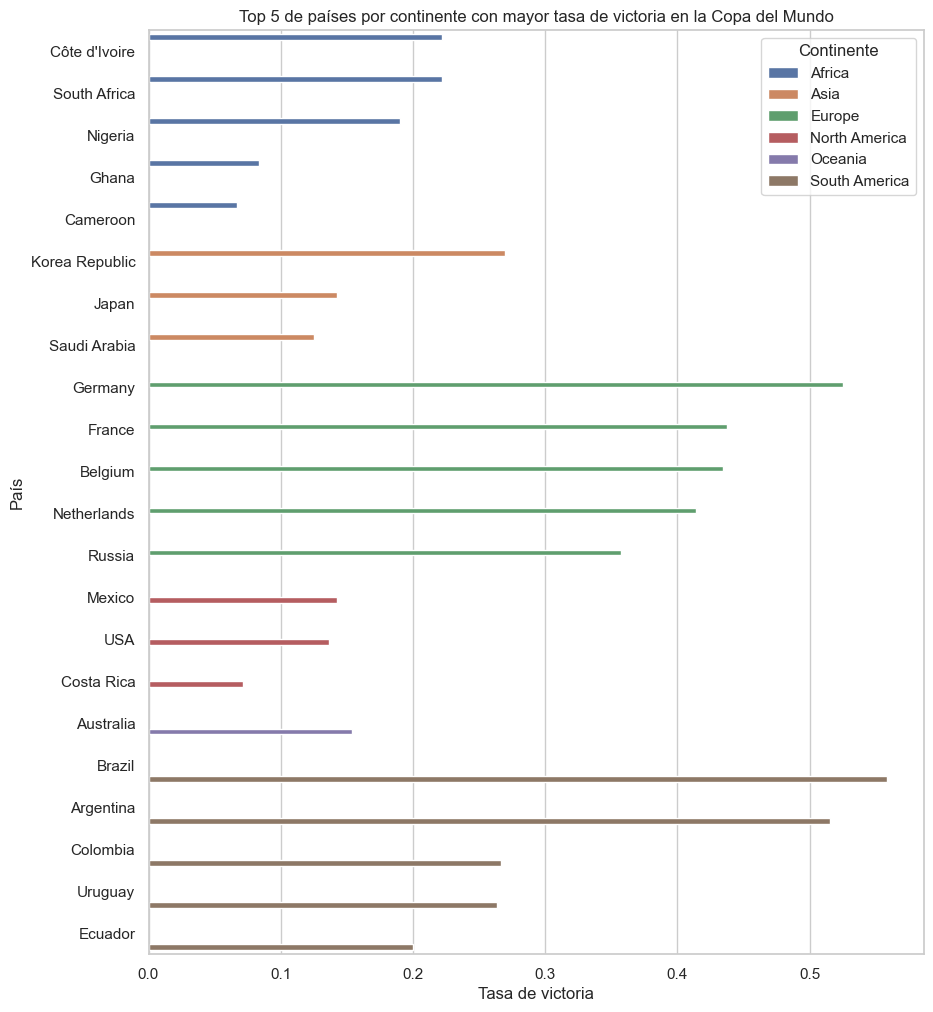

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de barras utilizando Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 12))
ax = sns.barplot(x='win_rate', y='country', hue='continent', data=top_5_by_continent)

plt.title('Top 5 de países por continente con mayor tasa de victoria en la Copa del Mundo')
plt.xlabel('Tasa de victoria')
plt.ylabel('País')
plt.legend(title='Continente')
plt.show()

# A partir de que año se toma puntajes?

In [32]:
# Filtrar el DataFrame para obtener solo las filas con valores no nulos en las columnas específicas
filtered_df = df.dropna(subset=['home_team_goalkeeper_score', 'away_team_goalkeeper_score',
                                'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score'])

# Ordenar las fechas en orden ascendente
sorted_dates = filtered_df['date'].sort_values()

# Tomar la fecha más antigua
earliest_date = sorted_dates.iloc[0]

print(f"La fecha más antigua con valores no nulos en las columnas 'score' es: {earliest_date}")

La fecha más antigua con valores no nulos en las columnas 'score' es: 2004-09-03


# Ranking por año

In [33]:
# Crear un DataFrame de equipos con sus rankings por año
home_team_rankings = df.groupby(['date', 'home_team'])['home_team_fifa_rank'].min()
away_team_rankings = df.groupby(['date', 'away_team'])['away_team_fifa_rank'].min()

# Concatenar los rankings de equipos como un solo DataFrame
team_rankings = pd.concat([home_team_rankings, away_team_rankings]).reset_index()

# Renombrar las columnas
team_rankings.columns = ['date', 'team', 'fifa_rank']

# Ordenar el DataFrame por fecha y equipo
team_rankings = team_rankings.sort_values(by=['date', 'team'])

# Imprimir el DataFrame de rankings de la FIFA por equipo y año
print(team_rankings)

             date        team  fifa_rank
23920  1993-08-08   Argentina          5
0      1993-08-08     Bolivia         59
1      1993-08-08      Brazil          8
23921  1993-08-08    Colombia         19
2      1993-08-08     Ecuador         35
...           ...         ...        ...
47834  2022-06-14         USA         15
23918  2022-06-14     Ukraine         27
23919  2022-06-14  Uzbekistan         83
47835  2022-06-14       Wales         18
47836  2022-06-14       Yemen        151

[47837 rows x 3 columns]


In [37]:
# Crear un DataFrame de equipos con sus rankings por año
home_team_rankings = df.groupby(['date', 'home_team'])['home_team_fifa_rank'].min()
away_team_rankings = df.groupby(['date', 'away_team'])['away_team_fifa_rank'].min()

# Concatenar los rankings de equipos como un solo DataFrame
team_rankings = pd.concat([home_team_rankings, away_team_rankings]).reset_index()

# Renombrar las columnas
team_rankings.columns = ['date', 'team', 'fifa_rank']

# Ordenar el DataFrame por fecha y equipo
team_rankings = team_rankings.sort_values(by=['date', 'fifa_rank'])

# Obtener el top 5 de países por año
top_5_by_year = (
    team_rankings.groupby('date')
    .apply(lambda group: group.nsmallest(5, 'fifa_rank'))
    .reset_index(drop=True)
)

In [39]:
top_5_by_year.head(20)

,date,team,fifa_rank
0,1993-08-08,Argentina,5
1,1993-08-08,Brazil,8
2,1993-08-08,Mexico,14
3,1993-08-08,Colombia,19
4,1993-08-08,Uruguay,22
5,1993-08-09,Guinea,65
6,1993-08-09,Sierra Leone,86
7,1993-08-11,Switzerland,3
8,1993-08-11,Sweden,4
9,1993-08-11,Norway,9


In [53]:
# Crear un DataFrame de equipos con sus rankings por año
home_team_rankings = df.groupby(['date', 'home_team'])['home_team_fifa_rank'].min()
away_team_rankings = df.groupby(['date', 'away_team'])['away_team_fifa_rank'].min()

# Concatenar los rankings de equipos como un solo DataFrame
team_rankings = pd.concat([home_team_rankings, away_team_rankings]).reset_index()

# Renombrar las columnas
team_rankings.columns = ['date', 'team', 'fifa_rank']

# Crear una nueva columna 'year' a partir de la columna 'date'
team_rankings['year'] = pd.to_datetime(team_rankings['date']).dt.year

# Calcular el ranking más alto de la FIFA por año para cada país
top_ranking_by_year = team_rankings.groupby(['year', 'team'])['fifa_rank'].min().reset_index()

# Ordenar los países por año y ranking en orden ascendente
top_ranking_by_year = top_ranking_by_year.sort_values(by=['year', 'fifa_rank'])

# Obtener los 5 países con el ranking más alto de la FIFA por año
top_5_by_year = (
    top_ranking_by_year.groupby('year')
    .apply(lambda group: group.nsmallest(5, 'fifa_rank'))
    .reset_index(drop=True)
)

# Mostrar el resultado
top_5_by_year

,year,team,fifa_rank
0,1993,Brazil,1
1,1993,Germany,1
2,1993,Italy,2
3,1993,Norway,2
4,1993,Switzerland,3
...,...,...,...
145,2022,Belgium,1
146,2022,Brazil,1
147,2022,France,3
148,2022,Argentina,4


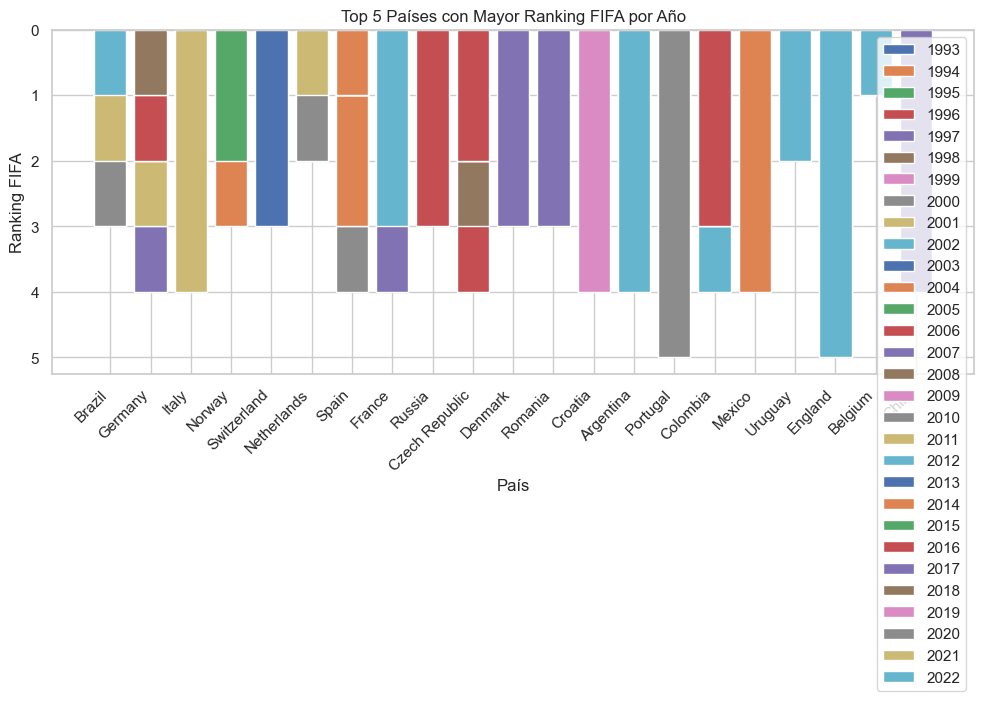

In [51]:
# Crear un gráfico de barras para el top 5 por año
fig, ax = plt.subplots(figsize=(10, 6))

for year, group in top_5_by_year.groupby('year'):
    ax.bar(group['team'], group['fifa_rank'], label=str(year))

ax.set_xlabel('País')
ax.set_ylabel('Ranking FIFA')
ax.set_title('Top 5 Países con Mayor Ranking FIFA por Año')
ax.legend()
ax.invert_yaxis()  # Invertir el eje Y para que el ranking más bajo esté en la parte superior

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()